https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset - TEST.CSV

Define

*   Logistic Regression
*   Linear SVC
*   Random Forest



In [1]:
models = {}

# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic_Regression'] = LogisticRegression(solver='liblinear')

# 2. Linear SVC
from sklearn.svm import SVC
models['Linear_SVC'] = SVC(kernel = 'linear')

# 3. Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random_Forest'] = RandomForestClassifier()

In [2]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
# load the data

df = pd.read_csv('test.csv')

df

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [4]:
# create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# vectorize the text data
X = vectorizer.fit_transform(df['Description'])
y = df['Class Index']

In [5]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
def model_fit_function(key, X_train, Y_train):
  models[key].fit(X_train, Y_train)

def model_predict_function(key, X_test):
  return models[key].predict(X_test)

In [7]:
m = 1

# For each classifier

for key in models.keys():
  print("Fit the classifier" + str(m))
  print(models[key])
  # train the classifier on the training data
  model_fit_function(key, X_train, y_train)
  print("*****************************************")
  m = m + 1

Fit the classifier1
LogisticRegression(solver='liblinear')
*****************************************
Fit the classifier2
SVC(kernel='linear')
*****************************************
Fit the classifier3
RandomForestClassifier()
*****************************************


Made predictions
*****************************************
Calculated evaluation metrics for LogisticRegression(solver='liblinear')

Accuracy:  85.066 %

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.87      0.87       373
           2       0.89      0.94      0.91       389
           3       0.85      0.77      0.81       359
           4       0.80      0.82      0.81       399

    accuracy                           0.85      1520
   macro avg       0.85      0.85      0.85      1520
weighted avg       0.85      0.85      0.85      1520


*Confusion matrix*




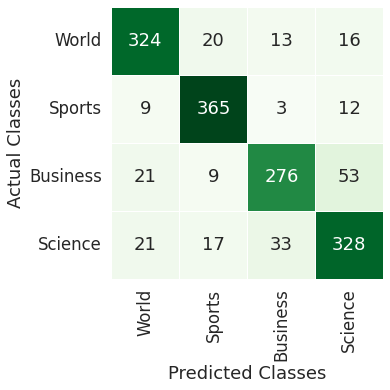


Made predictions
*****************************************
Calculated evaluation metrics for SVC(kernel='linear')

Accuracy:  87.171 %

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.88      0.88       373
           2       0.94      0.94      0.94       389
           3       0.84      0.81      0.82       359
           4       0.84      0.85      0.84       399

    accuracy                           0.87      1520
   macro avg       0.87      0.87      0.87      1520
weighted avg       0.87      0.87      0.87      1520


*Confusion matrix*




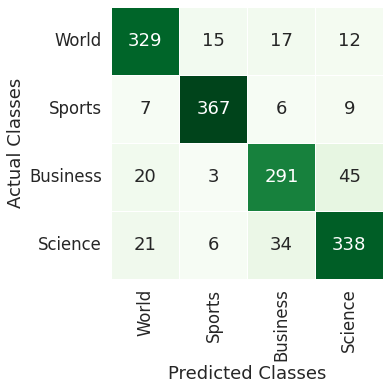


Made predictions
*****************************************
Calculated evaluation metrics for RandomForestClassifier()

Accuracy:  80.658 %

Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.80      0.82       373
           2       0.85      0.90      0.88       389
           3       0.83      0.71      0.76       359
           4       0.72      0.80      0.76       399

    accuracy                           0.81      1520
   macro avg       0.81      0.80      0.81      1520
weighted avg       0.81      0.81      0.81      1520


*Confusion matrix*




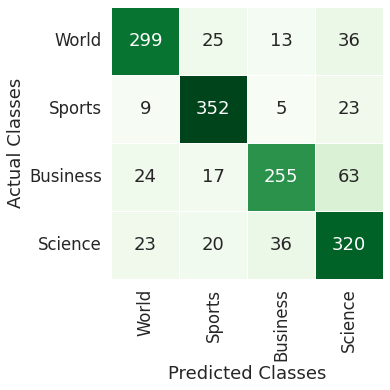

In [8]:
# For each classifier

for key in models.keys():
  print("Made predictions")
  # make predictions on the test data
  y_pred = model_predict_function(key, X_test)

  # evaluate the performance of each classifier
  print("*****************************************")
  print("Calculated evaluation metrics for " + str(models[key]))
  accuracy = accuracy_score(y_test, y_pred)
  print("\nAccuracy: ",round(accuracy*100,3),"%")
  report = classification_report(y_test, y_pred)
  print("\nClassification Report:\n", report)
  print("\n*Confusion matrix*\n")
  print()
  matrix = confusion_matrix(y_test, y_pred)
  matrix =pd.DataFrame(matrix, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
  sns.set(font_scale=1.5)
  plt.figure(figsize=(5,5));
  sns.heatmap(matrix, cmap='Greens',linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
  plt.xlabel("Predicted Classes");
  plt.ylabel("Actual Classes");
  plt.show()
  print()